In [34]:
import pandas as pd
import numpy as np
import pathlib
from PIL import Image
import cv2
import tensorflow as tf
import keras

**loading data**

In [35]:

directory = "/content/drive/MyDrive/allMyCoding/flowersRecognition/flowers"
directory = pathlib.Path(directory)
print(len(list(directory.glob('*/*.jpg'))))

4323


In [36]:
flower_images={
    'daisy' : list(directory.glob('daisy/*.jpg')),
    'dandelin': list(directory.glob('dandelin/*.jpg')),
    'rose':list(directory.glob('rose/*.jpg')),
    'sunflowers':list(directory.glob('sunflowers/*.jpg')),
    'tulip':list(directory.glob('tulip/*.jpg'))
}


**giving label**


In [37]:
flower_labels = {
    'daisy':0,
    'dandelin':1,
    'rose':2,
    'sunflowers':3,
    'tulip':4
}

**resizing images**

In [38]:
X,y=[],[]
for flower_name,images in flower_images.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img=cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flower_labels[flower_name])

In [39]:
# covering into array
X = np.array(X)
y = np.array(y)

**normalization**

In [40]:
X = X/255

**spliting**

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


augmentation

In [42]:
from keras import layers
from keras.layers.experimental import preprocessing
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(180, 180,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
])

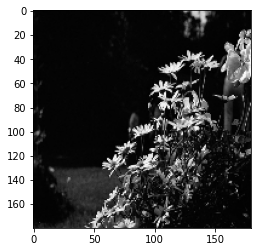

In [43]:
# original image
import matplotlib.pyplot as plt
plt.imshow(X[4])

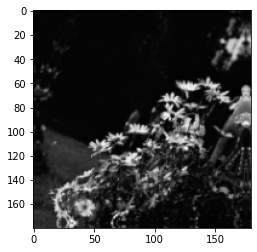

In [44]:
# augmented image
plt.imshow(data_augmentation(X)[4])

**model**

In [149]:
model = keras.Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(5, activation="softmax")
])

**compile**

In [144]:
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])


**training**

In [145]:
model_history = model.fit(X_train, y_train, epochs=100)


Epoch 1/100
60/60 [==============================] - 2s 24ms/step - loss: 1.3901 - accuracy: 0.3478
Epoch 2/100
60/60 [==============================] - 1s 22ms/step - loss: 0.9985 - accuracy: 0.4887
Epoch 3/100
60/60 [==============================] - 1s 22ms/step - loss: 0.8602 - accuracy: 0.6057
Epoch 4/100
60/60 [==============================] - 1s 22ms/step - loss: 0.8080 - accuracy: 0.6418
Epoch 5/100
60/60 [==============================] - 1s 23ms/step - loss: 0.7348 - accuracy: 0.6711
Epoch 6/100
60/60 [==============================] - 1s 23ms/step - loss: 0.7040 - accuracy: 0.6951
Epoch 7/100
60/60 [==============================] - 1s 23ms/step - loss: 0.6890 - accuracy: 0.7036
Epoch 8/100
60/60 [==============================] - 1s 22ms/step - loss: 0.6817 - accuracy: 0.7051
Epoch 9/100
60/60 [==============================] - 1s 23ms/step - loss: 0.6713 - accuracy: 0.6930
Epoch 10/100
60/60 [==============================] - 1s 22ms/step - loss: 0.6713 - accuracy: 0.7227

In [146]:
model.save("flower_recognition.h5")

**evaluation**

In [147]:
model.evaluate(X_test,y_test)

20/20 [==============================] - 0s 11ms/step - loss: 1.2125 - accuracy: 0.7780


[1.2125047445297241, 0.7779527306556702]

In [150]:
import pydot

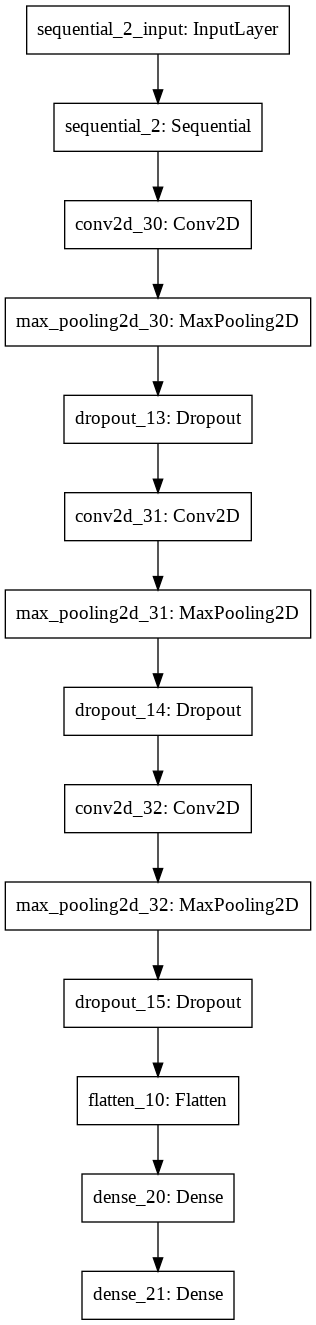

In [151]:
keras.utils.plot_model(model)

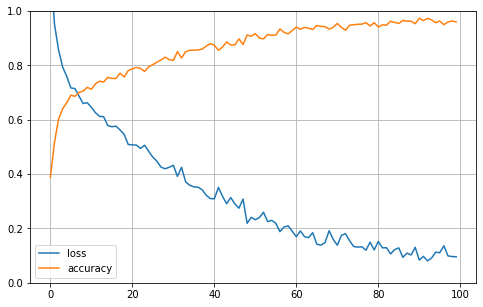

In [152]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [153]:
new = X_test[:2]


In [154]:
pred = model.predict(new)

In [155]:
pred.round(2)

array([[0.21, 0.2 , 0.15, 0.24, 0.21],
       [0.2 , 0.23, 0.15, 0.23, 0.18]], dtype=float32)

In [156]:
y_pred = model.predict_classes(new)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [157]:
y_pred

array([3, 3])

In [158]:
class_name = ["daisy","dandelion","rose","sunflower","tulip"]

In [159]:
np.array(class_name)[y_pred]

array(['sunflower', 'sunflower'], dtype='<U9')

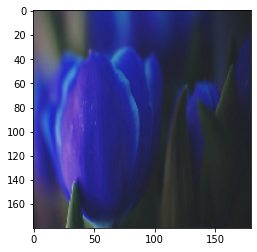

In [161]:
plt.imshow(X_test[3])

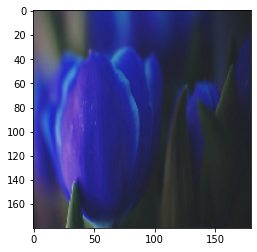

In [162]:
plt.imshow(X_test[3])